# Illustration Power method and Arnoldi iteration

In [164]:
import numpy as np
import scipy as sp

# dimension
d = 3;

# Spectrum
D = np.zeros([d,d]);
for i in range(d):
    D[i,i] = i+1;

# Transition matrices (Passage)
P   = np.random.random([d,d]);
P   = P@P.transpose();
P,R = sp.linalg.qr(P);

# Actual matrix
A = P@D@P.transpose();

In [165]:
# Eig control
v,V = sp.linalg.eig(A)
print(v)
print(V)

[1.+0.j 2.+0.j 3.+0.j]
[[ 0.74370899  0.61215318 -0.26863624]
 [ 0.55748507 -0.78968994 -0.25612534]
 [ 0.36892728 -0.04072203  0.92856577]]


Text(0.5, 0, 'z')

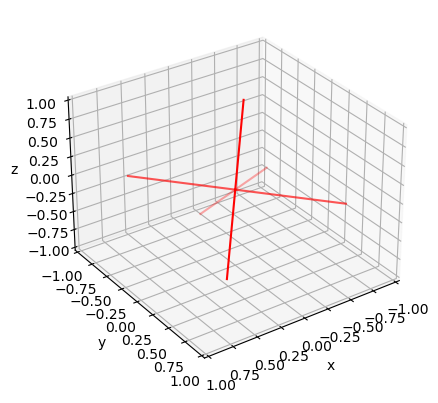

In [166]:
import pylab as pl

fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(d):
    ax.plot([0, V[0,i]],[0, V[1,i]],zs=[0, V[2,i]], color=(1,0,0,0.33*(i+1)))
    ax.plot([0, -V[0,i]],[0, -V[1,i]],zs=[0, -V[2,i]], color=(1,0,0,0.33*(i+1)))

ax.set_xlim3d(-1,1);
ax.set_ylim3d(-1,1);
ax.set_zlim3d(-1,1);
ax.view_init(azim=55)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Power iteration

In [241]:
b = np.random.random([d,1]);
K = np.empty([d,0])
K = np.concatenate((K,b/np.linalg.norm(b[:,0])),axis=1);

Anb = b;
N = 3;

for i in range(N):
    Anb = A@Anb;
    for j in range(np.shape(K)[1]):
        KK  = np.reshape(K[:,j], (d,1))
        Anb = Anb - (Anb.T@KK)*KK
    print(np.linalg.norm(Anb))
    Anb /= np.linalg.norm(Anb)
    K   = np.concatenate((K,Anb),axis=1);

print(b)

0.1903109940739171
0.20337525151370964
2.975418419039454e-15
[[0.78132492]
 [0.82217823]
 [0.43152227]]


Text(0.5, 0, 'z')

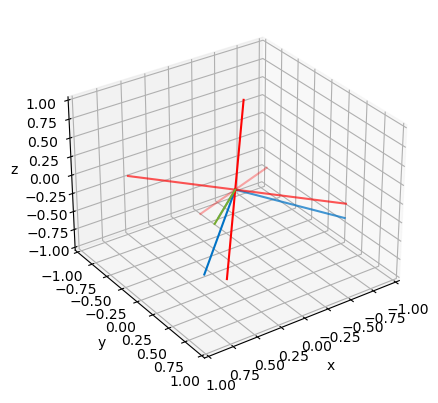

In [246]:
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')

c = [((i+1)/N)*0.8+0.2 for i in range(N)];
for i in range(N):
    ax.plot([0, K[0,i]],[0, K[1,i]],zs=[0, K[2,i]], color=(0,0.447,0.774,c[i]))

for i in range(d):
    ax.plot([0, V[0,i]],[0, V[1,i]],zs=[0, V[2,i]], color=(1,0,0,0.33*(i+1)))
    ax.plot([0, -V[0,i]],[0, -V[1,i]],zs=[0, -V[2,i]], color=(1,0,0,0.33*(i+1)))

ax.plot([0, b[0,0]],[0, b[1,0]],zs=[0, b[2,0]], color=[0.4660, 0.6740, 0.1880])

ax.set_xlim3d(-1,1);
ax.set_ylim3d(-1,1);
ax.set_zlim3d(-1,1);
ax.view_init(azim=55)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [269]:
def arnoldi_iteration(A, b, n: int):
    """Compute a basis of the (n + 1)-Krylov subspace of the matrix A.

    This is the space spanned by the vectors {b, Ab, ..., A^n b}.

    Parameters
    ----------
    A : array_like
        An m × m array.
    b : array_like
        Initial vector (length m).
    n : int
        One less than the dimension of the Krylov subspace, or equivalently the *degree* of the Krylov space. Must be >= 1.
    
    Returns
    -------
    Q : numpy.array
        An m x (n + 1) array, where the columns are an orthonormal basis of the Krylov subspace.
    h : numpy.array
        An (n + 1) x n array. A on basis Q. It is upper Hessenberg.
    """
    eps = 1e-12
    h = np.zeros((n + 1, n))
    Q = np.zeros((A.shape[0], n + 1))
    # Normalize the input vector
    Q[:, 0] = b / np.linalg.norm(b, 2)  # Use it as the first Krylov vector
    for k in range(1, n + 1):
        v = np.dot(A, Q[:, k - 1])  # Generate a new candidate vector
        for j in range(k):  # Subtract the projections on previous vectors
            h[j, k - 1] = np.dot(Q[:, j].conj(), v)
            v = v - h[j, k - 1] * Q[:, j]
        h[k, k - 1] = np.linalg.norm(v, 2)
        if h[k, k - 1] > eps:  # Add the produced vector to the list, unless
            Q[:, k] = v / h[k, k - 1]
        else:  # If that happens, stop iterating.
            return Q, h
    return Q, h

Q,h = arnoldi_iteration(A,b[:,0],n=4)

#np.linalg.eig(A)
np.linalg.eig(h[:N,:N])



(array([1., 2., 3.]),
 array([[-0.98772172, -0.15537125,  0.0162963 ],
        [ 0.15538701, -0.96629244,  0.20526516],
        [-0.01614532,  0.2052771 ,  0.97857071]]))

## Arnoldi iteration: eigenvalue algorithm

In [158]:
# Dimension
d = 100;

# Random matrix
B = np.random.random([d,d]);

# Krylov basis
N = int(d*0.9);
b = np.random.random([d,1]);
K = b/np.linalg.norm(b[:,0]);

Bnb = b;
for i in range(N):
    Bnb = B@Bnb;
    for j in range(1):
        Bnb = Bnb - np.dot(Bnb.T,K[:,j])*K[:,j]
    Bnb /= np.sqrt(np.dot(Bnb.T,Bnb))
    K   = np.concatenate((K,Bnb),axis=1);

[[ 0.12269389  0.04648231 -0.15796048 ...         nan         nan
          nan]
 [ 0.1570346   0.00385796 -0.08014223 ...         nan         nan
          nan]
 [ 0.0197264          nan         nan ...         nan         nan
          nan]
 ...
 [ 0.00691827         nan         nan ...         nan         nan
          nan]
 [ 0.01162962         nan         nan ...         nan         nan
          nan]
 [ 0.08363301         nan         nan ...         nan         nan
          nan]]


/tmp/ipykernel_41732/962927348.py:17: RuntimeWarning: invalid value encountered in sqrt
  Bnb /= np.sqrt(np.dot(Bnb.T,Bnb))
